In [2]:
%load_ext autoreload
%autoreload 2

from dlp.dataset import Dataset
from dlp.visualizer import Visualizer, SemanticVisualizer
from PIL import Image
from IPython.display import display
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
ds = Dataset()
home_path = str(Path.home())
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

# Pyplot Visualizer

In [14]:
# Instantiate the visualizer object
vis = Visualizer(ds)
parking = vis.parking_spaces # pandas dataframe
# 取出后八列数据，转成[n, 4, 2]的numpy数组
parking = parking.iloc[:, -8:].values.reshape(-1, 2).reshape(-1, 4, 2)
parking

array([[[ 28.53      ,  73.73      ],
        [ 31.14642857,  73.73      ],
        [ 31.14642857,  68.51      ],
        [ 28.53      ,  68.51      ]],

       [[ 31.14642857,  73.73      ],
        [ 33.76285714,  73.73      ],
        [ 33.76285714,  68.51      ],
        [ 31.14642857,  68.51      ]],

       [[ 33.76285714,  73.73      ],
        [ 36.37928571,  73.73      ],
        [ 36.37928571,  68.51      ],
        [ 33.76285714,  68.51      ]],

       ...,

       [[130.62      ,   6.48      ],
        [133.22      ,   6.48      ],
        [133.22      ,   0.95      ],
        [130.62      ,   0.95      ]],

       [[133.22      ,   6.48      ],
        [135.82      ,   6.48      ],
        [135.82      ,   0.95      ],
        [133.22      ,   0.95      ]],

       [[135.82      ,   6.48      ],
        [138.42      ,   6.48      ],
        [138.42      ,   0.95      ],
        [135.82      ,   0.95      ]]])

In [5]:
vis.parking_spaces

,id,area,top_left_x,top_left_y,top_right_x,top_right_y,btm_right_x,btm_right_y,btm_left_x,btm_left_y
0,1,A,28.530000,73.73,31.146429,73.73,31.146429,68.51,28.530000,68.51
0,2,A,31.146429,73.73,33.762857,73.73,33.762857,68.51,31.146429,68.51
0,3,A,33.762857,73.73,36.379286,73.73,36.379286,68.51,33.762857,68.51
0,4,A,36.379286,73.73,38.995714,73.73,38.995714,68.51,36.379286,68.51
0,5,A,38.995714,73.73,41.612143,73.73,41.612143,68.51,38.995714,68.51
...,...,...,...,...,...,...,...,...,...,...
0,360,I,125.420000,6.48,128.020000,6.48,128.020000,0.95,125.420000,0.95
0,361,I,128.020000,6.48,130.620000,6.48,130.620000,0.95,128.020000,0.95
0,362,I,130.620000,6.48,133.220000,6.48,133.220000,0.95,130.620000,0.95
0,363,I,133.220000,6.48,135.820000,6.48,135.820000,0.95,133.220000,0.95


## Plot scene

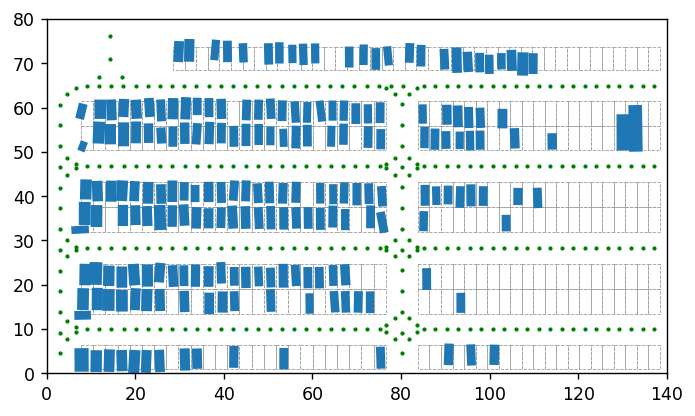

In [3]:
# Plot scene
ax = vis.plot_waypoints()
ax = vis.plot_scene(ds.list_scenes()[0], ax=ax)
plt.show()

## Plot the entire frame

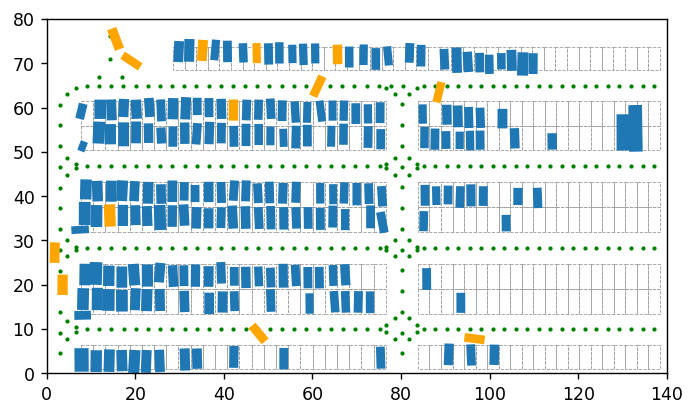

In [4]:
# Plot frame
scene = ds.get('scene', ds.list_scenes()[0])
ax = vis.plot_waypoints()
ax = vis.plot_frame(scene['first_frame'], ax=ax)
plt.show()

## Highlight the specified instance in this frame

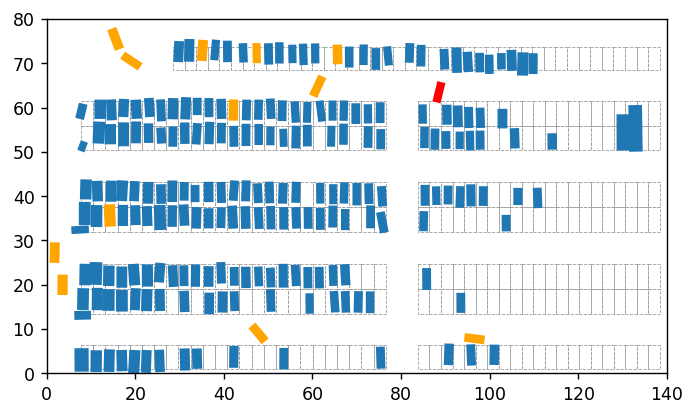

In [5]:
# Plot a certain instance
inst_to_highlight = ds.get_inst_at_location(scene['first_frame'], [90, 65])
ax = vis.highlight_instance(inst_to_highlight['instance_token'])
plt.show()

In [6]:
print(inst_to_highlight)

{'instance_token': '0a72735ac3b5f6f50bfa50ad8e91ac3e40277854', 'agent_token': 'a1b3619e3bc68c3de29af54ba9ff3de96c7de3dc', 'frame_token': '840d7356e46973280c5e71d628fc3b240bfd040a', 'coords': [88.55000000004657, 63.47999999998137], 'heading': 1.328607346410207, 'speed': 0.23, 'acceleration': [0.0056, 0.0089], 'mode': '', 'prev': '', 'next': '2e40de975f5ec83c4831c54f8cb58275785a3ea8'}


# Semantic Visualizer

In [31]:
# smt_vis = SemanticVisualizer(ds, spot_margin=0.3, resolution=0.1, sensing_limit=20, steps=10, stride=10)
smt_vis = SemanticVisualizer(ds, spot_margin=0.3, resolution=0.1, sensing_limit=20, steps=5, stride=10)

## Plot the entire frame

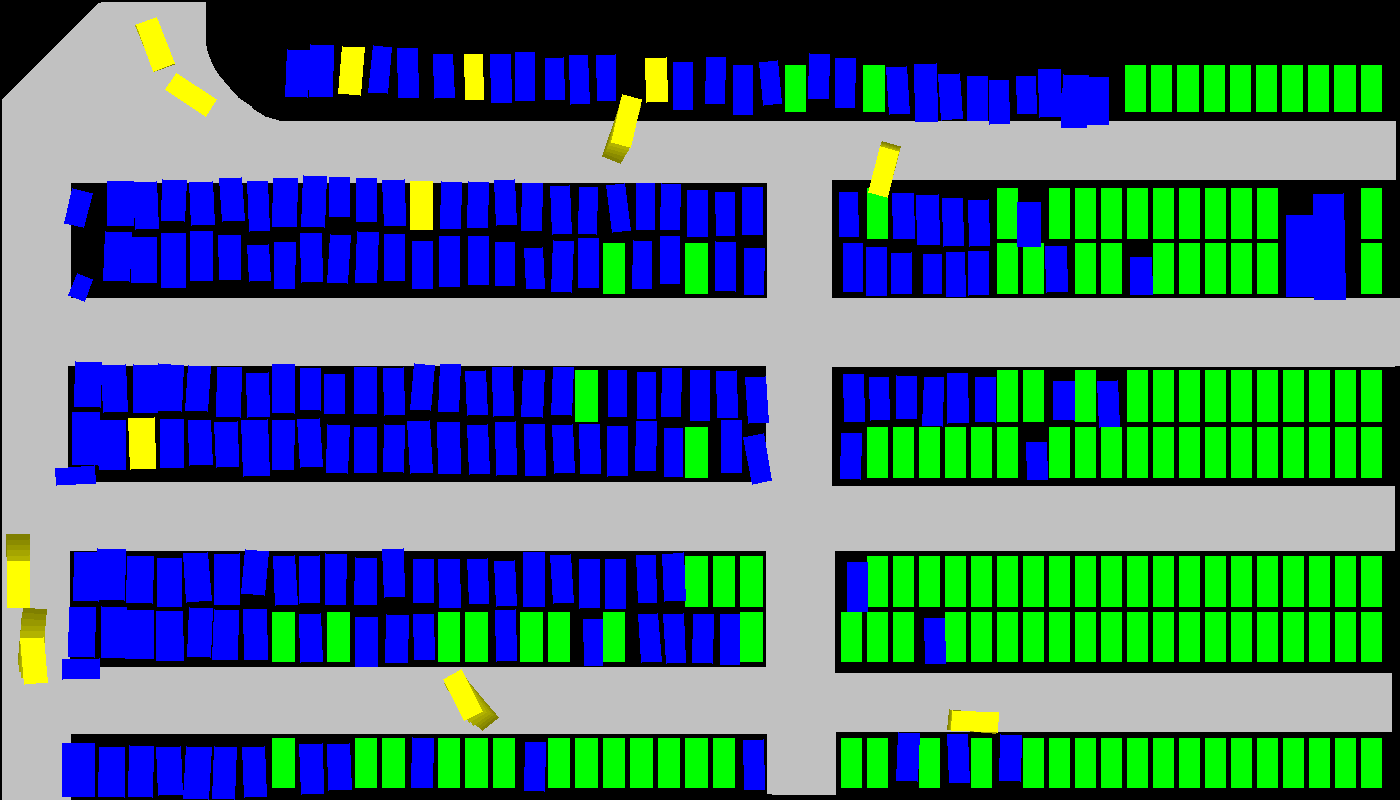

In [32]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=100)[-1]
# frame = ds.get('frame', scene['first_frame'])
img_frame = smt_vis.plot_frame(frame['frame_token'])
display(img_frame.transpose(Image.FLIP_TOP_BOTTOM))

## Plot the instance-centric crop

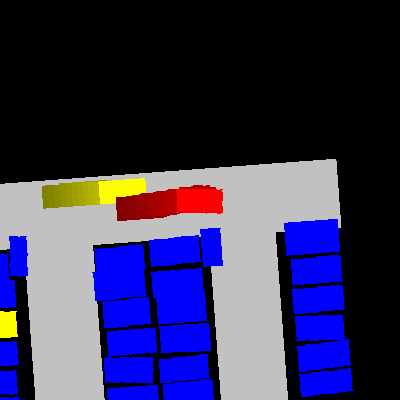

In [17]:
img = smt_vis.inst_centric(img_frame, frame['instances'][6])
display(img)

### Crop around a different center

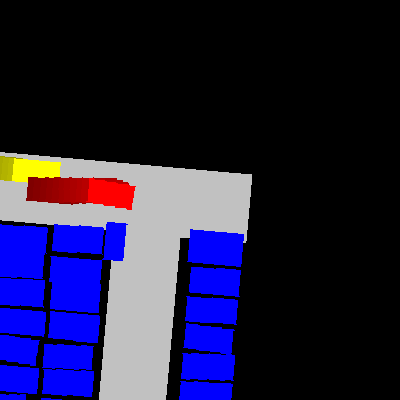

In [18]:
center_pose = np.array([3.27, 5, -1.65989265])
img = smt_vis.inst_centric(img_frame, frame['instances'][6], center_pose)
display(img)

## Future trajectory

In [19]:
traj = ds.get_future_traj(frame['instances'][6])
print(traj)

[[ 3.39       13.91       -1.49619265  1.58      ]
 [ 3.41       13.85       -1.48839265  1.59      ]
 [ 3.42       13.79       -1.48049265  1.59      ]
 ...
 [28.49        3.08       -1.55389265 -0.04      ]
 [28.49        3.08       -1.55379265 -0.04      ]
 [28.49        3.08       -1.55379265 -0.03      ]]


### Plot on to the instance centric view

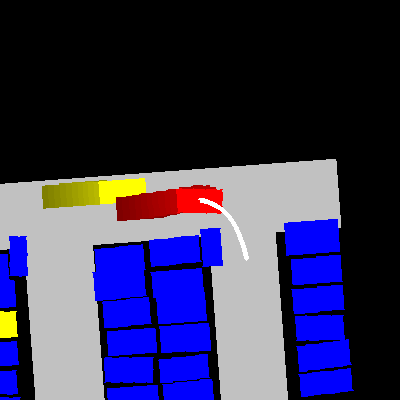

In [20]:
inst_token = frame['instances'][6]
instance = ds.get('instance', inst_token)
center_pose = np.array([instance['coords'][0], instance['coords'][1], instance['heading']])

img = smt_vis.inst_centric(img_frame, frame['instances'][6])
img = smt_vis.plot_traj(inst_centric_view=img, center_pose=center_pose, traj=traj[:100], color=(255,255,255), width=5)
display(img)